In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [4]:
df_lasso = pd.read_csv('LASSO-data-set.csv')

In [5]:
df_lasso.head(2)

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,modifier1,modifier2,modifier3,modifier4,modifier5,modifier6,modifier7,modifier8,score
0,156,181,54,61,159,60,170,58,56,60,56,60,6,4,4,4,652.566513
1,148,137,89,147,159,79,166,84,47,44,53,49,11,10,5,8,413.145270


In [6]:
X = df_lasso.drop('score', axis=1).copy()
X.head(2)

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,modifier1,modifier2,modifier3,modifier4,modifier5,modifier6,modifier7,modifier8
0,156,181,54,61,159,60,170,58,56,60,56,60,6,4,4,4
1,148,137,89,147,159,79,166,84,47,44,53,49,11,10,5,8


In [7]:
y = df_lasso[['score']].copy()
y.head(3)

,score
0,652.566513
1,413.145270
2,510.830805


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [9]:
model = LassoCV(cv = 5, random_state=0)
model.fit(X_train, y_train)

c:\Users\Beth Vander Hoek\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5, random_state=0)

In [10]:
model.alpha_

1.0749236577654118

In [11]:
lasso_best = Lasso(alpha=model.alpha_)
model = lasso_best.fit(X_train, y_train)

In [12]:
predict = lasso_best.predict(X_test)

In [13]:
type(predict)

numpy.ndarray

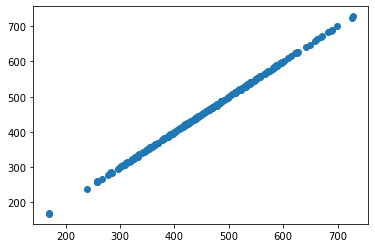

In [14]:
ax = plt.scatter(x=y_test, y=predict) 

In [15]:
new_df = pd.DataFrame()
new_df['Predicted'] = predict

In [16]:
new_df['Test'] = y_test
new_df

,Predicted,Test
0,541.614463,NaN
1,724.377887,413.145270
2,355.852620,510.830805
3,443.973270,NaN
4,498.569406,NaN
...,...,...
245,428.638370,NaN
246,525.603844,NaN
247,511.009832,478.764323
248,623.355301,NaN


In [17]:
new_df['Residual'] = abs(new_df.Predicted - new_df.Test)

In [18]:
new_df.head(2)

,Predicted,Test,Residual
0,541.614463,NaN,NaN
1,724.377887,413.14527,311.232617


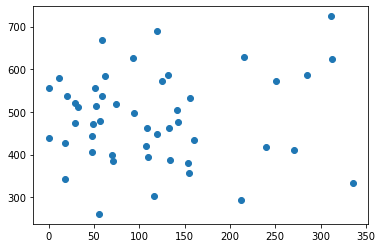

In [19]:
ax = plt.scatter(x=new_df['Residual'], y=predict)